In [2]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import scipy
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [ ]:
# format date, income, expend, income_type, expend_type

In [3]:
df = pd.read_csv('data2.csv')
df.head()

,date,money,money_typ
0,2017-01-01,-38.289249,Fitness
1,2017-01-02,-1.183553,Fitness
2,2017-01-03,-158.098343,Transport
3,2017-01-04,-74.805991,Shopping
4,2017-01-05,-102.053730,Social


In [156]:
income = df[df.money>0].money


(array([23., 26., 21., 30., 25., 27., 21., 23., 29., 23., 20., 30., 24.,
        19., 30., 22., 12., 15., 11., 12., 18., 10., 12.,  7.,  7., 13.,
         7., 11.,  8.,  3.,  4.,  3.,  5.,  3.,  5.,  2.,  2.,  2.,  2.,
         0.,  0.,  5.,  2.,  0.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([  0.49850531,   6.4017351 ,  12.30496488,  18.20819466,
         24.11142445,  30.01465423,  35.91788402,  41.8211138 ,
         47.72434359,  53.62757337,  59.53080316,  65.43403294,
         71.33726273,  77.24049251,  83.1437223 ,  89.04695208,
         94.95018187, 100.85341165, 106.75664143, 112.65987122,
        118.563101  , 124.46633079, 130.36956057, 136.27279036,
        142.17602014, 148.07924993, 153.98247971, 159.8857095 ,
        165.78893928, 171.69216907, 177.59539885, 183.49862864,
        189.40185842, 195.3050882 , 201.20831799, 207.11154777,
        213.01477756, 218.91800734, 224.82123713, 230.72446691,
        236.6276967 , 242.53092648, 248.43415627, 254.33738605,
        260.

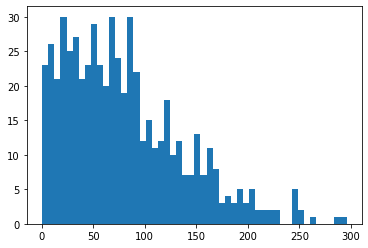

In [160]:
plt.hist(income, bins=50)


Optimization terminated successfully.
         Current function value: 3154.081354
         Iterations: 202
         Function evaluations: 393


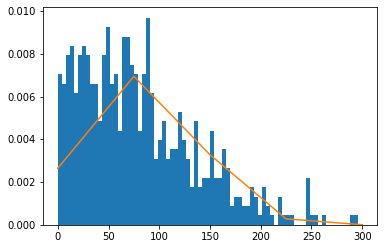

In [163]:
y = income
initial_guess = [0,math.log(100)]

# Plot the fitted density, and a histogram of the actual log10(data)
# (Using density=True rescales the histogram to have total area
# equal to 1, making it directly comparable to the fitted density plot.)
theta_hat = scipy.optimize.fmin(lambda theta: -np.sum(logPr(y,theta)), initial_guess , maxiter=50000)
plt.hist(income, bins=75, density=True)

y = np.linspace(0, 300 , num=5)


f = np.exp(logPr(y,theta_hat)) 
plt.plot(y, f)

In [17]:
income = df[df.money>0].money
income
np.sqrt(np.var(income))

57.24881635186751

In [18]:

def fit_normal_model(y):
    def logPr(y, theta):
        mu, tau = theta
        sigma =np.exp(tau)
        lik = scipy.stats.norm.pdf(y, loc=mu , scale=sigma)
        return np.log(lik)

    initial_guess = [np.mean(y),np.sqrt(np.var(y))]

    # Plot the fitted density, and a histogram of the actual log10(data)
    # (Using density=True rescales the histogram to have total area
    # equal to 1, making it directly comparable to the fitted density plot.)
    theta_hat = scipy.optimize.fmin(lambda theta: -np.sum(logPr(y,theta)), initial_guess , maxiter=5000)
    plt.hist(income, bins=75, density=True)

    y = np.linspace(0, 500 , num=100)


    f = np.exp(logPr(y,theta_hat)) 
    plt.plot(y, f)
    return theta_hat

Optimization terminated successfully.
         Current function value: 3154.081354
         Iterations: 63
         Function evaluations: 122


array([79.67878217,  4.04740721])

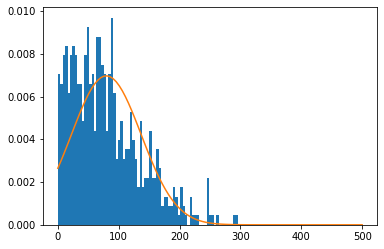

In [19]:
fit_normal_model(income)

In [134]:
theta_hat[0], math.exp(theta_hat[1])

(1188.8187284463654, 709.8629535219333)

161.06006738354984
3.4877804510345625
99.35247789638433
[-0.52579252  0.65773835 -5.80465669 ...  4.29075183 -2.10370574
 10.69226539]


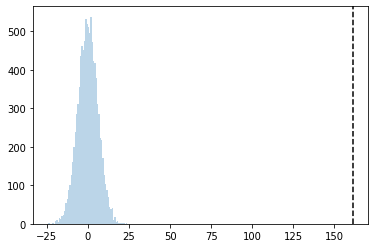

In [170]:
x = df[df.money<0].money
y = df[df.money>0].money

# 2. Define the test statistic
def t(x,y): 
    return np.mean(y) - np.mean(x)
print(t(x,y))
# 3. To generate a synthetic dataset, assuming H0, ... 
mu_hat = np.mean(np.concatenate([x,y]))
sigma_hat = np.sqrt(np.mean((np.concatenate([x,y])-mu_hat)**2))
print(mu_hat)
print(sigma_hat)
def rxy_star():
    return (np.random.normal(loc=mu_hat, scale=sigma_hat, size=len(x)), np.random.normal(loc=mu_hat, scale=sigma_hat, size=len(y)))
 # 4. Sample the test statistic, compare to what was observed, and find p-value 
t_ = np.array([t(*rxy_star()) for _ in range(10000)])
print(t_)
plt.hist(t_, bins=60, alpha=.3)
plt.axvline(x=t(x,y), linestyle='dashed', color='black')


In [24]:
income = ...
outcome = ...

# significance testing H0 = mu1 = mu2


# define read-out statistic
def t(x1, x2):
    np.mean(x1) - np.mean(x2)



# generate synthetic dataset


def rxy():



# plot the data and actual diff


array([0.47479858, 0.47470944])

In [ ]:
# proejction, significance testing, pension


In [175]:
df[df.money_typ==]


,date,money,money_typ
7,2017-01-08,177.147920,Other
8,2017-01-09,7.289925,Investment
11,2017-01-12,165.717329,Gift
12,2017-01-13,10.622001,Gift
13,2017-01-14,68.780873,Youtube
...,...,...,...
1085,2019-12-22,65.949695,Youtube
1087,2019-12-24,119.884232,Gift
1088,2019-12-25,119.396815,Other
1092,2019-12-29,244.862188,Investment


In [ ]:
# risk assessment
# based on your mean spend so far, and how much money you have left. How much time would you have before you 
# use all of your income 



# set a goal, and based on daily income and outcome, how much time the user would need to achive the goal

In [23]:
# given a date, fit the model so far, output how many days user has left before using all of its money
def days_left(d):
    df2 = df.copy()
    df2.date = df.date.apply(date.fromisoformat)
    df_in_thus_far = df2[df2.date <= d][df2.money < 0]
    df_out_thus_far = df2[df2.date <= d][df2.money > 0]
    params_in = fit_normal_model(df_in_thus_far.money)
    params_out = fit_normal_model(df_out_thus_far.money)
    money_left = df2[df2.date <= d].money.sum()
    return money_left / params_out[0]



Optimization terminated successfully.
         Current function value: 1101.988554
         Iterations: 66
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 1237.646096
         Iterations: 65
         Function evaluations: 126
22.36123986210151


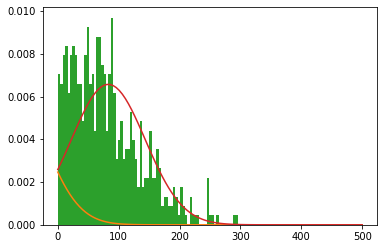

In [25]:

r = days_left(date(2018, 3, 1))
print(r)


In [35]:
# set a goal (how much money) 
# based on current income and expend so far, calculate how many days needed to achieve the goal
def days_needed(goal, d):
    df2 = df.copy()
    df2.date = df.date.apply(date.fromisoformat)
    df_in_thus_far = df2[df2.date <= d][df2.money < 0]
    df_out_thus_far = df2[df2.date <= d][df2.money > 0]
    params_in = fit_normal_model(df_in_thus_far.money)
    params_out = fit_normal_model(df_out_thus_far.money)
    money_left = df2[df2.date <= d].money.sum()
    if (params_in[0] - params_out[0] < 0):
        print("It seems you are spending more money than you earn so far, try spending less to achieve your goal")
    else:
        future_days = (goal - money_left) / (params_in[0] - params_out[0])
        print("You need to keep going for {%d} days to achive your goal", future_days)


Optimization terminated successfully.
         Current function value: 1101.988554
         Iterations: 66
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 1237.646096
         Iterations: 65
         Function evaluations: 126
It seems you are spending more money than you earn so far, try spending            less to achieve your goal
None


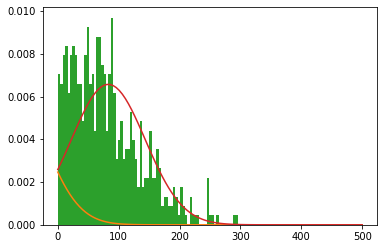

In [34]:
print(days_needed(10000, date(2018, 3, 1)))